## Shared Bikes Demand Prediction - BoomBikes

#### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

**Essentially, the company wants to know**:


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands


**Overall Step to Build a ML model**

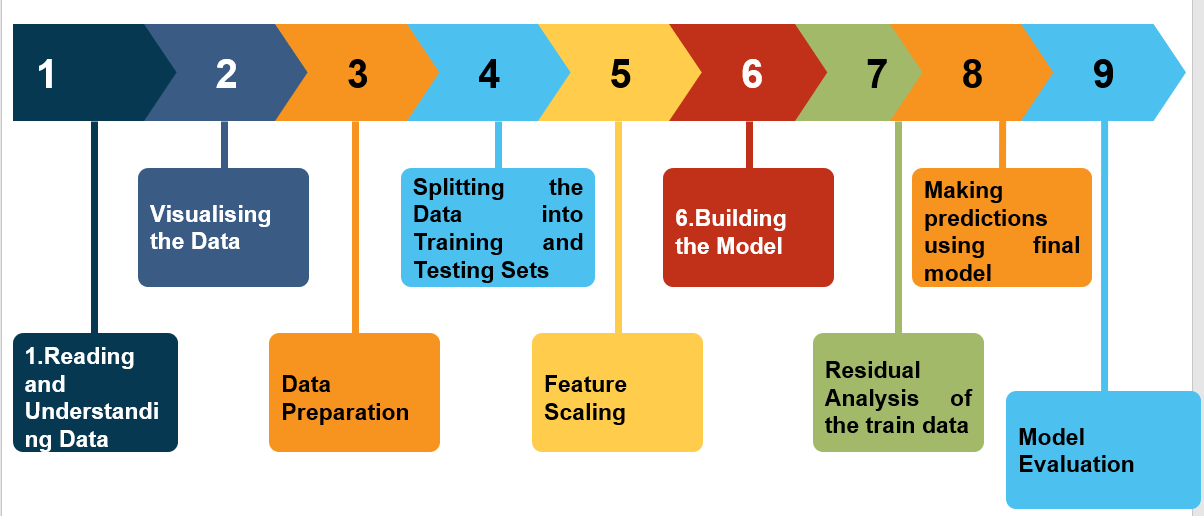

This solution is divided into the following main sections: 
- Data understanding/exploration
- Data Visualisation 
- Data preparation/cleaning
- Model building and evaluation
- Residual Analysis (verifying the assumptions of Linear Model)


### 1. Data Understanding/Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [154]:
import warnings
warnings.filterwarnings('ignore')

In [155]:
# Reading the dataset
bike = pd.read_csv("day.csv")

In [157]:
# Let's take a look at the first few rows
bike.head(3).append(bike.tail(3))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [158]:
# Let's look at the number of rows and columns in the dataset
bike.shape

(730, 16)

In [61]:
# Understanding the feature names in the dataset
print(bike.columns)
bike.dtypes.value_counts()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


int64      11
float64     4
object      1
dtype: int64

In [62]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [159]:
# Getting insights of the features
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [64]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.
print(bike['season'].value_counts())
# 1=spring
bike.loc[(bike['season'] == 1) , 'season'] = 'spring'

# 2=summer
bike.loc[(bike['season'] == 2) , 'season'] = 'summer'

# 3=fall
bike.loc[(bike['season'] == 3) , 'season'] = 'fall'

# 4=winter
bike.loc[(bike['season'] == 4) , 'season'] = 'winter'

3    188
2    184
1    180
4    178
Name: season, dtype: int64


In [65]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
bike['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [66]:
# year (0: 2018, 1:2019)
bike['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [67]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
# Check the data before change
print(bike['mnth'].astype('category').value_counts())
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
bike[['mnth']] = bike[['mnth']].apply(object_map)

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64


In [68]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
bike['mnth'].astype('category').value_counts(ascending = True)

Feb     56
Apr     60
Jun     60
Nov     60
Sept    60
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Name: mnth, dtype: int64

In [69]:
# whether day is a holiday or not (0: No, 1: Yes)
bike['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [70]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thur', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'})

# Applying the function to the two columns
bike[['weekday']] = bike[['weekday']].apply(str_map)

In [71]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
bike['weekday'].astype('category').value_counts()

Mon     105
Tue     105
Wed     105
Sat     104
Sun     104
Thur    104
Fri     103
Name: weekday, dtype: int64

In [72]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
bike['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [73]:
# Optional: Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bike.loc[(bike['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bike.loc[(bike['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bike.loc[(bike['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike.loc[(bike['weathersit'] == 4) , 'weathersit'] = 'D'

In [74]:
# Extracting the type of weather situations present in the data
print(bike['weathersit'].unique())
print(bike['weathersit'].astype('category').value_counts(ascending = True))

['B' 'A' 'C']
C     21
B    246
A    463
Name: weathersit, dtype: int64


In [75]:
# Converting date to datetime format
print("As is:",bike['dteday'].dtypes)
bike['dteday']=bike['dteday'].astype('datetime64')
print("Now:", bike['dteday'].dtypes)

As is: object
Now: datetime64[ns]


### Conclusion: 1. Data Understanding/Exploration

In this section, we have analysed the given dataset w.r.to it's structure. In the process, we have changed the data types of few columns and also changed some of the values based on Data Dictionary.

### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **Data Content Analysis**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

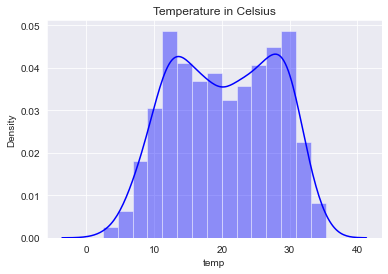

In [164]:
# temp: temperature in Celsius
sns.set_style("darkgrid")
sns.distplot(bike['temp'],bins = 15, color = 'b').set(title='Temperature in Celsius')
plt.show()

<font color='red'> **Q1. What is Density here?**</font>
- **Q2. What will happen if I change the bins to 5 or 55? Will the graph shows a Normal Distribution?**


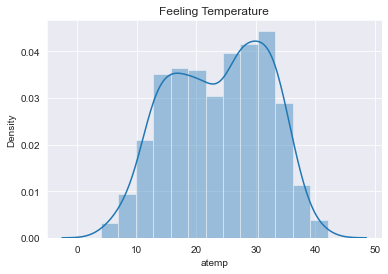

In [77]:
# feeling temperature
sns.distplot(bike['atemp']).set(title='Feeling Temperature')
plt.show()

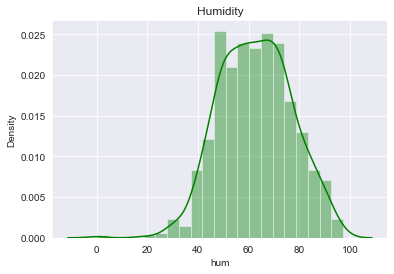

In [78]:
# humidity
sns.distplot(bike['hum'], color = 'g').set(title='Humidity')
plt.show()

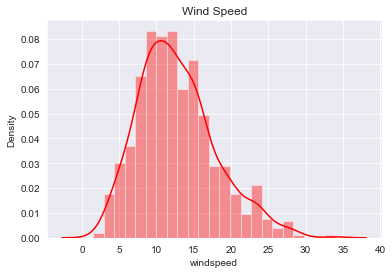

In [79]:
# wind speed
sns.distplot(bike['windspeed'], color = 'r').set(title='Wind Speed')
plt.show()

#### Let's analyse our dependent variables: cnt

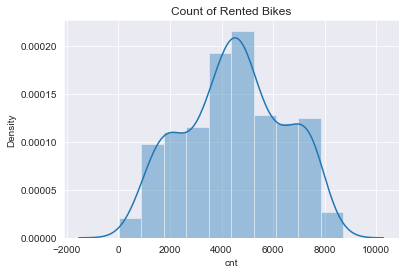

In [80]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(bike['cnt'], bins = 10).set(title='Count of Rented Bikes')
plt.show()

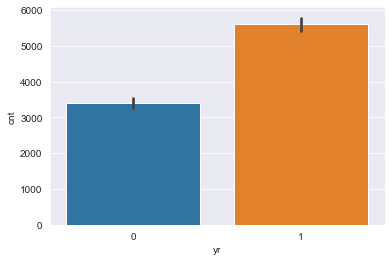

In [81]:
# 0: 2018, 1: 2019
sns.barplot(x='yr', y='cnt', data=bike)
plt.show()

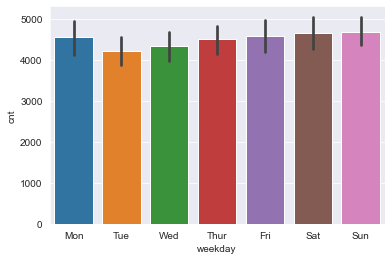

In [82]:
sns.barplot(x='weekday', y='cnt', data=bike)
plt.show()

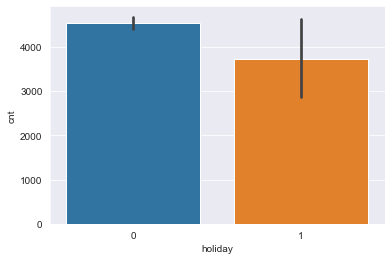

In [83]:
# Holiday - 0: No, 1: Yes
sns.barplot(x='holiday', y='cnt', data=bike)
plt.show()

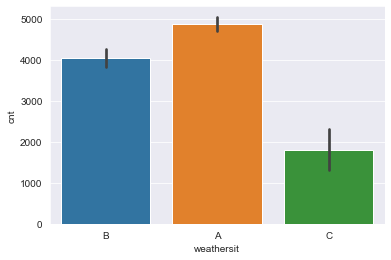

In [84]:
# weathersit
# 'A'- Clear, Few clouds, Partly cloudy, Partly cloudy
# 'B'- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 'C'- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 'D'- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

sns.barplot(x='weathersit', y='cnt', data=bike)
plt.show()

In [85]:
# All categorical variables in the dataset
bike_categorical = bike.select_dtypes(exclude=['float64','datetime64','int64'])
print("Only categorical varibales:", bike_categorical.columns)

Only categorical varibales: Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [86]:
bike_categorical.head(3).append(bike_categorical.tail(3))

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tue,B
2,spring,Jan,Wed,A
727,spring,Dec,Mon,B
728,spring,Dec,Tue,A
729,spring,Dec,Wed,B


In [87]:
bike.dtypes.value_counts()

int64             7
object            4
float64           4
datetime64[ns]    1
dtype: int64

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

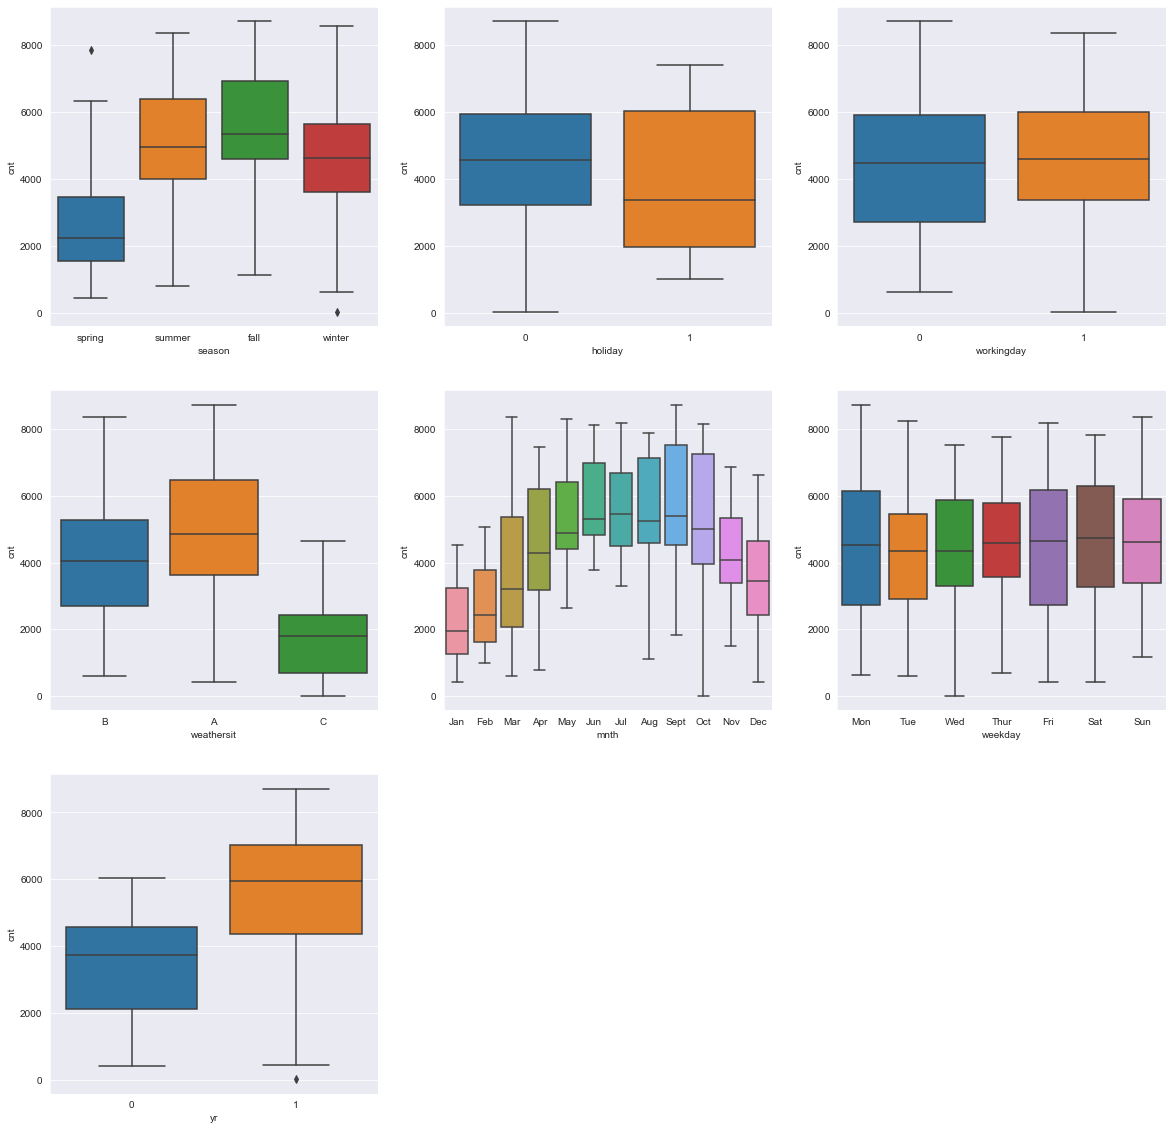

In [88]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [89]:
# Converting "casual","registered" and "cnt" Integer/discreate variables to float. 
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
Int_Var_List = ["casual","registered","cnt"]

for var in Int_Var_List:
    bike[var] = bike[var].astype("float")
bike[Int_Var_List].head(3)

,casual,registered,cnt
0,331.0,654.0,985.0
1,131.0,670.0,801.0
2,120.0,1229.0,1349.0


In [90]:
# All numeric variables in the dataset
bike_numeric = bike.select_dtypes(include=['float64'])
bike_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [91]:
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:red purple',
        'xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:red purple',
        'xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:red purple',])

def modified_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)
    

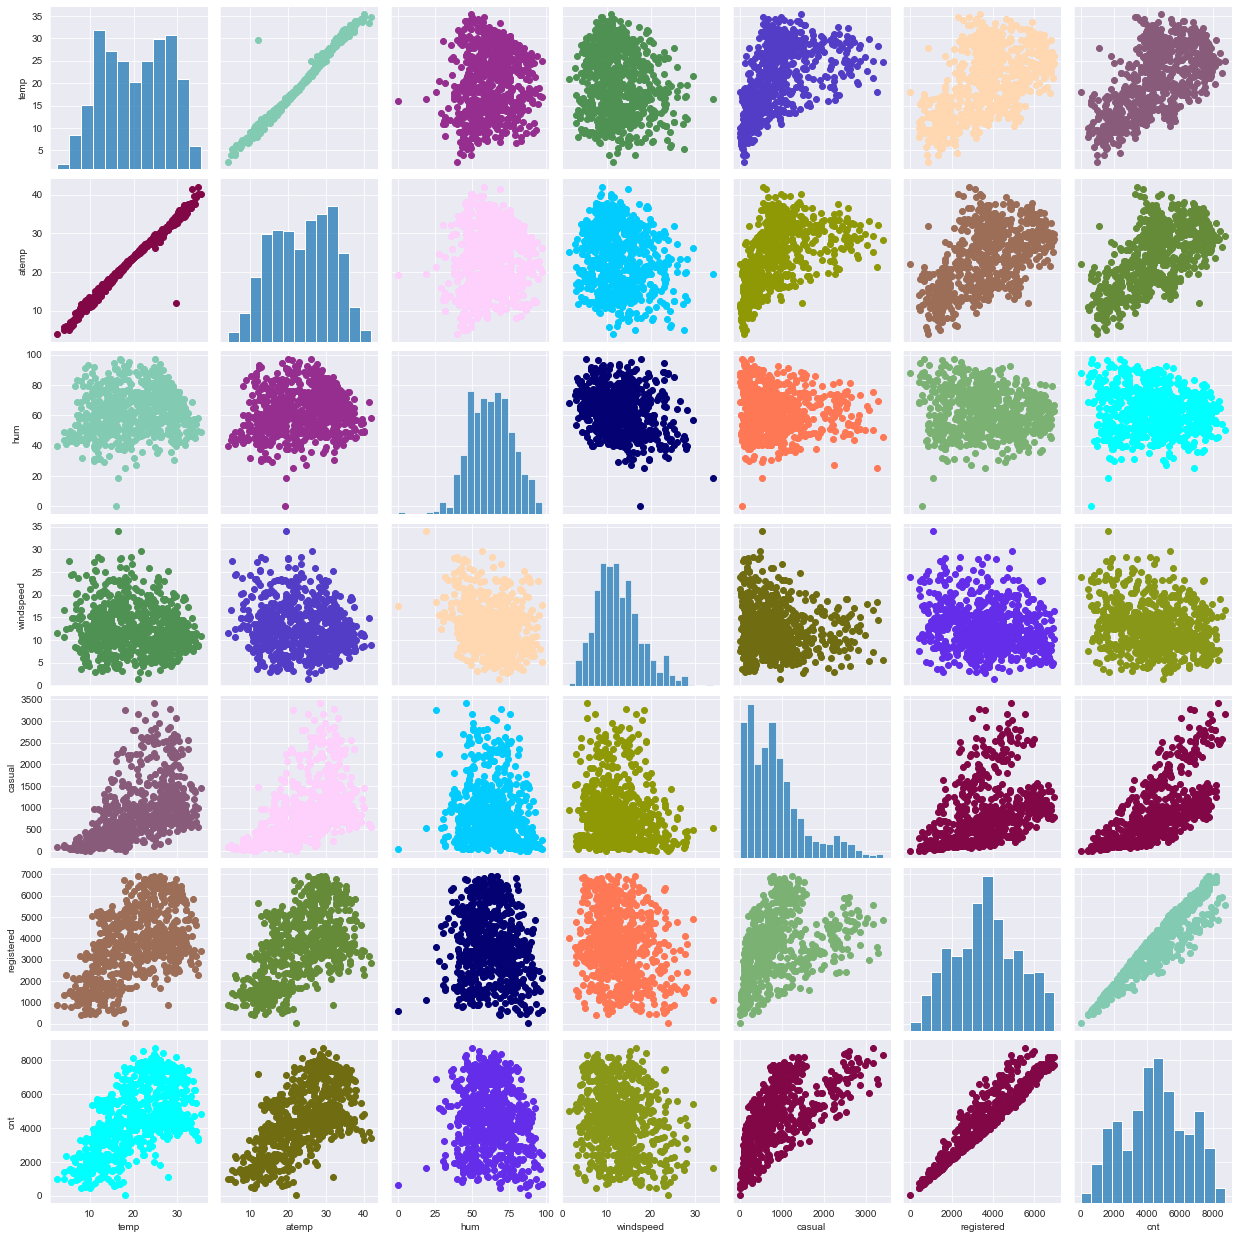

In [92]:
# Pairwise scatter plot
g = sns.pairplot(bike_numeric)

g.map_offdiag(modified_scatter)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [93]:
# Correlation matrix
cor = bike_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


Let's plot the correlations on a heatmap for better visualisation

<AxesSubplot:>

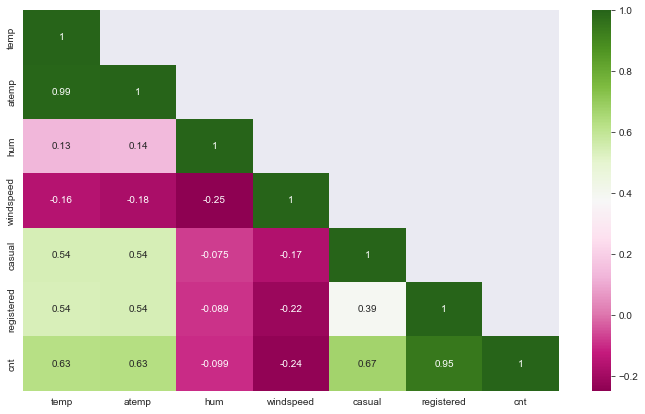

In [94]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,7)
sns.heatmap(cor, mask=mask, cmap = 'PiYG', annot=True)

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.
- correlation with "humidity" and "cnt" is almost negligible (- 0.09)

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1 - Suggesting that these two variables almost always give similar information. 


Thus, while building the model, we'll have to pay attention to **multicollinearity**.

In [95]:
#removing atemp as it is highly correlated with temp
bike.drop('atemp',axis=1,inplace=True)    

In [96]:
print(bike.shape)
print(bike.dtypes.value_counts())

(730, 15)
float64           6
int64             4
object            4
datetime64[ns]    1
dtype: int64


### Conclusion: 2. Data Visualization

In this section, we have looked at the actual data content.We plotted few distribution plots and a correleation Matrix and heatmap for numerical varibales. We also removed one of the features "atemp" as it was highly correlated with the another varibales "temp". 

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [97]:
# Subset all categorical variables
bike_categorical=bike.select_dtypes(include=['object'])
bike_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tue,B
2,spring,Jan,Wed,A
3,spring,Jan,Thur,A
4,spring,Jan,Fri,A


#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [98]:
# Convert into dummies
bike_dummies = pd.get_dummies(bike_categorical, drop_first=True)
bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### <font color='red'> Q. Why do we use drop_first=True during dummy variable creation? Does it really matters?</font>
- Yes, it is important to use **drop_first = True**  while creating the dummy variables. It helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables. Hence if we have categorical variable with N distinc values, then we need only N-1 columns to represent the dummy variables.


In [99]:
# Drop categorical variable columns
bike = bike.drop(list(bike_categorical.columns), axis=1)

In [100]:
# Concatenate dummy variables with the original dataframe
bike = pd.concat([bike, bike_dummies], axis=1)

In [101]:
# Let's check the first few rows
bike.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# Check Column 'instant'[Record Index] and 'dteday'[Date]

print(len(bike.instant.unique()))
print(len(bike.dteday.unique()))

730
730


In [103]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
bike=bike.drop(['instant','dteday'], axis = 1, inplace = False)
bike.head(3).append(bike.tail(3))

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
727,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,1,0,0,0
729,1,0,1,8.849153,57.7500,10.374682,439.0,2290.0,2729.0,1,...,0,0,0,0,0,0,0,1,1,0


### Conclusion: 3. Data Preparation

The main task done in this section are:
- create the respective dummy variables
- delete the irrelevant data

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [104]:
# Before splitting, make a copy of the cleaned data frame
bike_c = bike.copy()
print(bike.shape)
print(bike_c.shape)

(730, 31)
(730, 31)


In [105]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [106]:
print(df_train.shape)
df_train.head(10)

(510, 31)


,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,13.803347,72.9583,14.707907,177.0,1506.0,1683.0,0,...,0,0,0,0,1,0,0,0,1,0
580,1,0,0,32.526653,61.3333,17.249686,2345.0,4479.0,6824.0,0,...,0,0,1,0,0,0,0,0,0,0
500,1,0,1,26.103347,69.7917,8.208304,991.0,6433.0,7424.0,0,...,0,0,0,0,0,0,0,0,0,0
479,1,0,1,19.543347,42.7917,7.959064,655.0,5541.0,6196.0,0,...,0,0,0,0,0,0,0,0,0,0
472,1,0,1,18.996653,56.9167,11.250104,347.0,4020.0,4367.0,0,...,0,0,0,0,0,0,0,0,1,0


### Scaling

- for better interpretability
- only the numeric columns and not the dummy variables
- only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using **MinMaxScaler**. You can use any other scaling method like **Standardization**

In [107]:
from sklearn.preprocessing import MinMaxScaler 
# from sklearn.preprocessing import StandardScaler - in case you want to use Standardization method

In [108]:
scaler = MinMaxScaler()

In [109]:
bike_numeric.columns  # created in previous section

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [110]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [111]:
df_train[var].describe()

# Please note that min is 0 and max. is 1 now

,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As expected, the variables have been appropriately scaled.

In [112]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


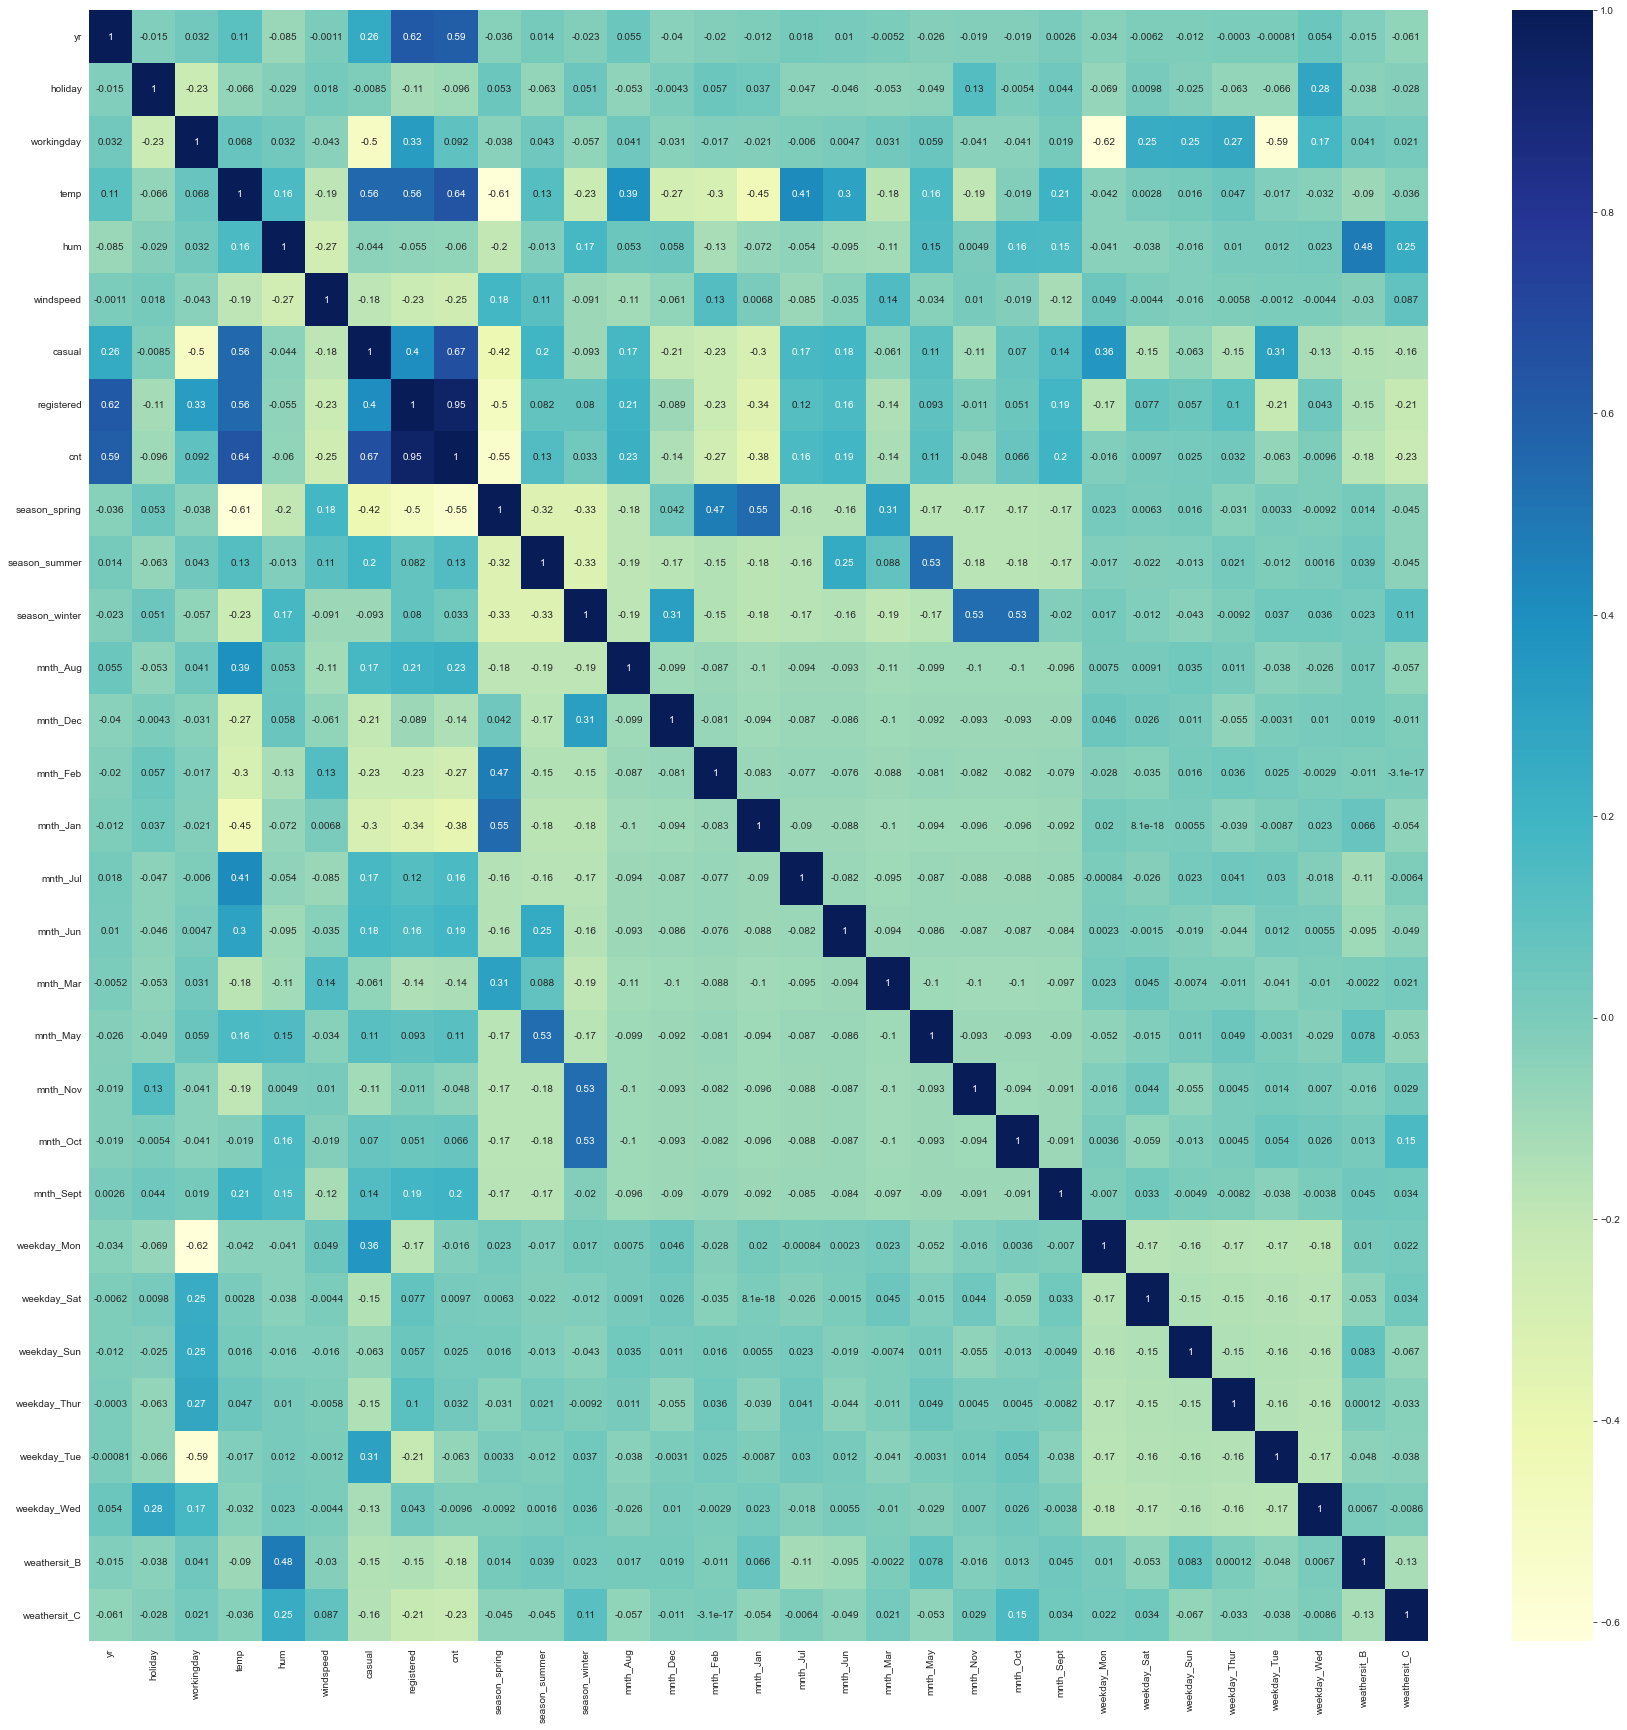

In [113]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most, after 'casual' and 'registered'. Let's see a pairplot for `temp` vs `cnt`.

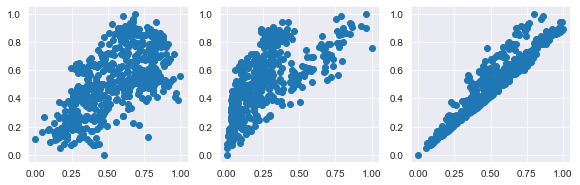

In [114]:
plt.figure(figsize=(20, 20)) 

plt.subplot(6,6,1)
plt.scatter(df_train.temp, df_train.cnt)

plt.subplot(6,6,2)
plt.scatter(df_train.casual, df_train.cnt)

plt.subplot(6,6,3)
plt.scatter(df_train.registered, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [115]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [116]:
print(X_train.shape)
X_train.head()

(510, 28)


,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [117]:
y_train.shape

(510,)

### Building the first model with all the features

Let's now build our first model with all the features.

In [118]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_model1 = sm.OLS(y_train, X_train_lm).fit()

lr_model1.params

const            0.242930
yr               0.232116
holiday          0.006726
workingday       0.093651
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon      0.098544
weekday_Sat     -0.003849
weekday_Sun      0.005388
weekday_Thur    -0.013502
weekday_Tue      0.044008
weekday_Wed     -0.015519
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [119]:
# Creating a model using sklearn Linear Regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [120]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.32222269e-01  5.86273244e+11  5.86273244e+11  4.50597873e-01
 -1.51613822e-01 -1.86532562e-01 -4.83346123e-02  3.84962092e-02
  1.05910876e-01  1.40772031e-02 -4.56521135e-02 -3.21133300e-02
 -6.26341574e-02 -4.05223248e-02 -3.05168574e-03  1.17167861e-03
  2.39959983e-02 -4.19160792e-02  7.56761162e-03  8.10349988e-02
  5.86273244e+11 -3.67630130e-03  5.39255563e-03 -1.34318064e-02
  5.86273244e+11 -1.54656522e-02 -6.10079080e-02 -2.57337578e-01]
-586273244435.6692


In [121]:
# getting the model summary from statsmodel
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          8.74e-182
Time:                        05:50:25   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.035      6.854      0.000       0.173       0.313
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0067      0.024      0.278      0.781      -0.041       0.054
workingday        0.0937      0.012      7.783      0.000       0.070       0.117
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon       0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat      -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun       0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thur     -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tue       0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed      -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.28e+16
================================================================

This model has an Adjusted R-squared value of **84.5%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable. 

#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [122]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  7  8  1  1]


#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [123]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sept,weekday_Mon,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0


In [124]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          2.31e-191
Time:                        05:50:26   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.5%** to **84.4%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [125]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
a=X_train_rfe1.drop('const',axis=1)

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_B,2.29
0,yr,2.09
12,weekday_Mon,1.98


In [128]:
# RFE with 8 features
lm = LinearRegression()
rfe2 = RFE(lm, 8)

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  1  7  1  1  1  1  5  2 13 10 11  8  1 20 21 12  9 17  3  6 19 18 16
 14 15  4  1]


In [129]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0


In [130]:
# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.0
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          8.21e-179
Time:                        05:50:26   Log-Likelihood:                 470.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     501   BIC:                            -884.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4318      0.030     14.567

Now let's check the VIF for these selected features and decide further.

In [131]:
b=X_train_rfe2.drop('const',axis=1)

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.49
2,temp,10.38
4,windspeed,3.89
0,yr,2.03
5,season_spring,1.80
6,mnth_Jul,1.35
7,weathersit_C,1.11
1,holiday,1.03


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [133]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,0,0
576,1.0,1,0,0.815169,0.264686,0,1,0
426,1.0,1,0,0.442393,0.255342,1,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0


In [134]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     279.8
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          9.08e-169
Time:                        05:50:26   Log-Likelihood:                 443.86
No. Observations:                 510   AIC:                            -871.7
Df Residuals:                     502   BIC:                            -837.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2627      0.020     13.191

The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [135]:
c=X_train_rfe2.drop('const',axis=1)

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.95
3,windspeed,3.73
0,yr,2.03
4,season_spring,1.50
5,mnth_Jul,1.26
6,weathersit_C,1.05
1,holiday,1.03


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.5%` with **28 variables** to just `79.3%` using **7 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model: **`lm3`**

**Note**: Adjusted R-squared value with *9 variables* was `80.1%`, but I opted for a slightly less complex model with relatively similar accuracy but fewer features.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals. This is to ensure that we satisfy the underlying assumption of liner regression model.
- Linear relationship between X and Y
- Error terms are normally distributed (not X, Y)
- Error terms are independent of each other
- Error terms have constant variance (homoscedasticity)

In [137]:
# Making Prediction on train data set
y_train_cnt = lm3.predict(X_train_rfe2)

In [138]:
y_train_cnt.describe()

count    510.000000
mean       0.513620
std        0.200378
min       -0.018011
25%        0.379925
50%        0.528334
75%        0.685674
max        0.869609
dtype: float64

In [185]:
# Check the Mean of Error terms
residuals = y_train - y_train_cnt
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
residuals.describe()

Mean of Residuals 1.801391280151602e-17


count    5.100000e+02
mean     1.801391e-17
std      1.014414e-01
min     -4.565648e-01
25%     -5.472297e-02
50%      1.411437e-02
75%      5.620928e-02
max      3.221568e-01
dtype: float64

So, the mean of error terms is almost 0

**Error terms are normally distributed**

We will check if the residuals or error terms are normally distributed or not.

Text(0.5, 0, 'Errors')

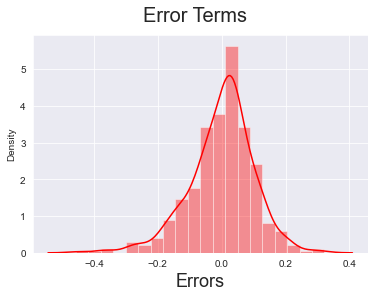

In [166]:
# Plot the histogram of the error or residuals terms terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20, color = 'r')
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

**Check for Homoscedasticity**

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we should confirm that there is no pattern in the error terms.

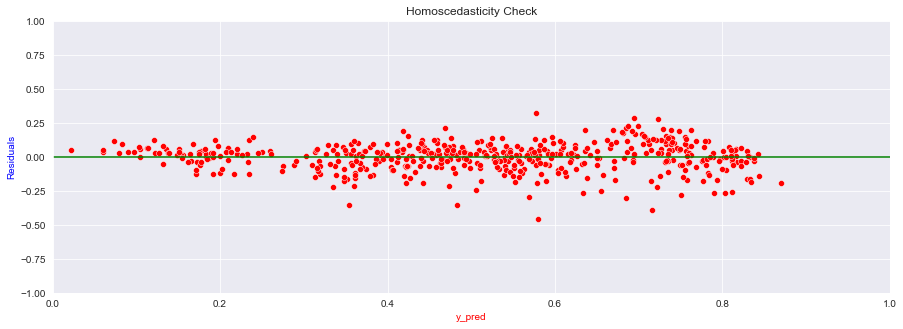

In [200]:
plt.figure(figsize=(15,5))
p = sns.scatterplot(y_train_cnt,residuals, color = "r")
plt.xlabel('y_pred', color = 'r')
plt.ylabel('Residuals', color = 'b')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot([0,1],[0,0],color='g')
p = plt.title('Homoscedasticity Check')
plt.show()

**Error terms are independent of each other**

That means there should not be any auto-correlation between error terms.

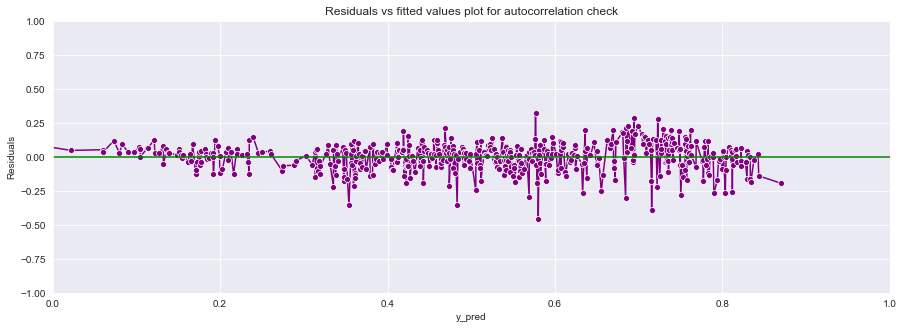

In [199]:
plt.figure(figsize=(15,5))
p = sns.lineplot(y_train_cnt,residuals,marker='o',color='purple')
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot([0,1],[0,0],color='green')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [195]:
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,0,0
576,1.0,1,0,0.815169,0.264686,0,1,0
426,1.0,1,0,0.442393,0.255342,1,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0


In [141]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [142]:
# df_test holds the test dataset for us
df_test[var] = scaler.transform(df_test[var])

In [143]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [144]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [145]:
# Let's check the list 'col2' which had the 7 variables RFE had selected
col2=c.columns
print(len(col2))
col2

7


Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'mnth_Jul',
       'weathersit_C'],
      dtype='object')

In [146]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [147]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    uint8  
 6   mnth_Jul       219 non-null    uint8  
 7   weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(3)
memory usage: 10.9 KB


In [148]:
# Making predictions using our final model: lm3
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

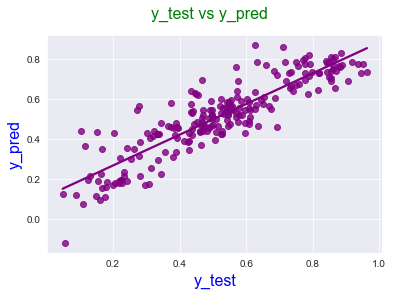

In [149]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
#plt.scatter(y_test, y_pred)
sns.regplot(x=y_test,y=y_pred,ci=None,color ='purple');
fig.suptitle('y_test vs y_pred', fontsize = 16, color = 'green')              # Plot heading 
plt.xlabel('y_test', fontsize = 16, color = 'blue')                          # X-label
plt.ylabel('y_pred', fontsize = 16, color = 'blue')                          # Y-label

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [150]:
# r2_score for 8 variables on test dataset and it's predcition
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
print("r2 score is: ",r2_score)
n = len(X_test)
p = 7
print("and Adjusted r2 score is: ",1-(1-r2_score)*(n-1)/(n-p-1))


r2 score is:  0.7835777059426586
and Adjusted r2 score is:  0.7763978194099506


Thus, for the model with 7 variables, the r-squared on training and test data is about 79.6% and 78.35% respectively. The **Adjusted r-squared** on the train and test set is 79.3% and 77.63% respectively.

#### Checking the correlations between the final predictor variables

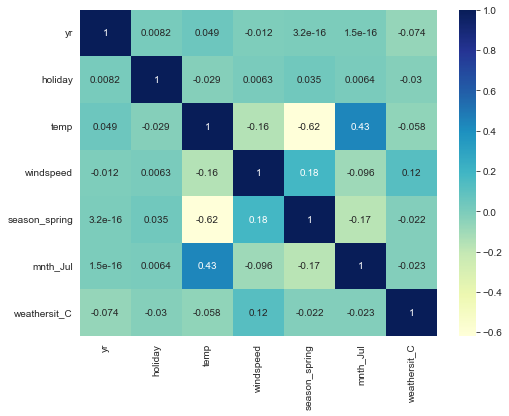

In [151]:
# Figure size
plt.figure(figsize=(8,6))

# Heatmap
sns.heatmap(bike[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations. 

Thus, the final model consists of the **7 variables** mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.



In [152]:
print(type(lm3.params))
print(abs(lm3.params).sort_values(ascending = False)) # It's magnitude of the coefficinets that matters

<class 'pandas.core.series.Series'>
temp             0.425758
const            0.262712
weathersit_C     0.243368
yr               0.235742
windspeed        0.151936
season_spring    0.140685
holiday          0.074754
mnth_Jul         0.072583
dtype: float64


#### Suggestion to BoomBikes Management

We can conclude from our model that below three features are the most influential features for BIke Rentals:
- Temperature : with coefficient `0.42`
- Weather C [3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ]:  with coefficient `0.24`
- Year: with coefficient `0.23`

### Conclusion: 4. Model Building and Evaluation

In this section, we build our first model considering all the variables and then we made an informed choice based on VIF and p-values and finally made our baseline model with 7 variables. We also plotted the error term to check if they are normally distributed. Our regression line also looks pretty clustered around the central line.

### <font color= "blue"> End of assignment </font>